## Summer School on Deep Learning-2019 Surathkal, Karnataka

### Classification of Single Digit (MNIST) using CNN

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import os
os.chdir('/content/drive/My Drive/SSDL/Day2/Image')
print(os.getcwd())

**Imports**

In [0]:
import keras
import tensorflow
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

**Dataset**

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
a = X_test[10]
plt.imshow(a)

In [0]:
y_test_5 = (y_test==5)
y_train_5 = (y_train==5)

In [0]:
print(y_test_5[10])
print(y_test_5[100])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],  28, 28, 1).astype('float32')

In [0]:
print(len(X_train))
print(len(y_train_5))
print(len(X_test))
print(len(y_test_5))

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

**Pre-Processing**

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train_5 = np_utils.to_categorical(y_train_5)
y_test_5 = np_utils.to_categorical(y_test_5)
num_classes =2

In [0]:
from keras import models
from keras import layers

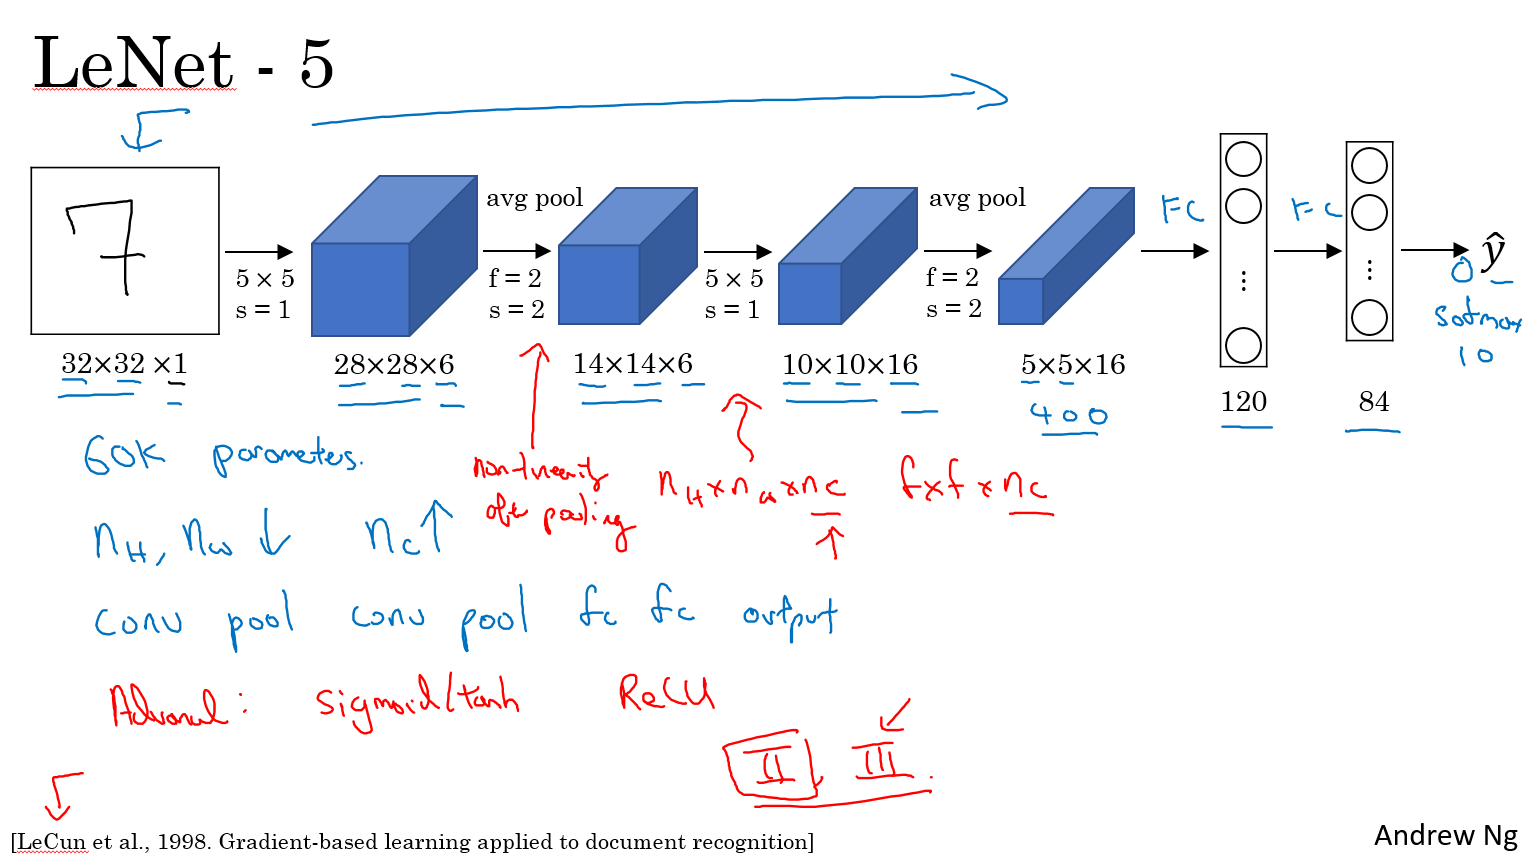

In [0]:
from IPython.display import Image, display
display(Image(filename='/content/drive/My Drive/SSDL/Day2/Image/LeNet.png', embed=True))

**LeNet Model**

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(28,28,1), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

model.summary()

**Keras Callbacks**
1.   Model CheckPoint
2.   CSV Logger
3.   TensorBoard

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [0]:
import os
os.chdir("/content/drive/My Drive/SSDL/Day2")
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger,ReduceLROnPlateau,LearningRateScheduler,EarlyStopping
mc = ModelCheckpoint('Models/single_digit_cnn_mnist_lnet.h5', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='Models/logs', write_graph=True,write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('Models/single_digit_cnn_mnist_lnet.h5.csv',append=True)
rp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
lrate = LearningRateScheduler(step_decay)
ea = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)


In [0]:
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [0]:
#from sklearn.model_selection import train_test_split
#history=model.fit(X_train,y_train_5, validation_split=(0.2), epochs=10, batch_size=200, verbose=2)

In [0]:
from sklearn.model_selection import train_test_split
history=model.fit(X_train,y_train_5, validation_split=(0.2), epochs=10, batch_size=200, verbose=2,callbacks=[cv,mc])

In [0]:
scores = model.evaluate(X_test, y_test_5, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(10)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

**Saving and loading models**

In [0]:
from keras.models import load_model
model2 = load_model('/content/drive/My Drive/SSDL/Day2/Models/single_digit_cnn_mnist_lnet.h5')

#### Prediction on Test data

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 15  #0->10  #101            #5---15  23
plt.imshow(X_test[image_index].reshape(28, 28),cmap='viridis')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred)
print(pred.argmax())
#102

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(500):
  plt.imshow(X_test[i].reshape(28, 28),cmap='Greys')
  pred = model.predict(X_test[i].reshape(1, 28, 28, 1))
  print(""+str(i+1)+" Actual is "+ " " + str(y_test[i])+" Predicted is"+str(pred.argmax()))